Accuracy: 0.8095238095238095
Precision: 0.8
Recall: 0.8888888888888888
F1-score: 0.8421052631578948
Classification Report:
               precision    recall  f1-score   support

           M       0.80      0.89      0.84        36
           R       0.83      0.70      0.76        27

    accuracy                           0.81        63
   macro avg       0.81      0.80      0.80        63
weighted avg       0.81      0.81      0.81        63



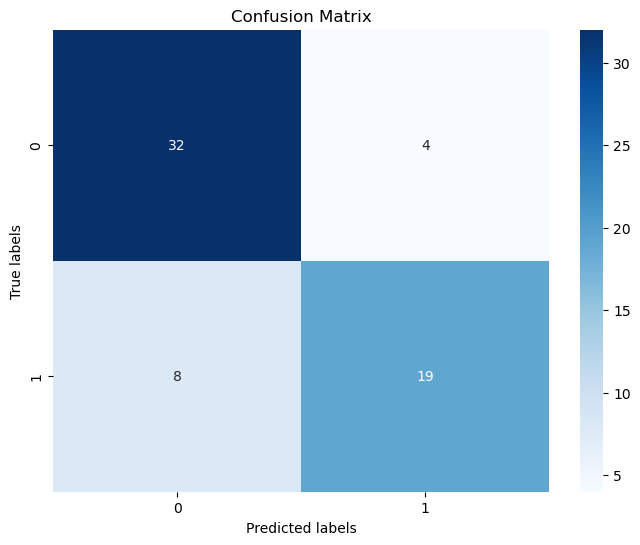

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
sonar = pd.read_csv('sonar.all-data.csv')

# Define features and target variable
X = sonar.drop(['R'], axis=1)  # Exclude the last column which is the target variable 'R'
y = sonar['R']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Set random state for reproducibility

# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Get precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [2]:
# Display the first few rows of the loaded dataset
print(sonar.head())

   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.0078  R  
2  0.0040  0.0117  R  


In [3]:
# Load the dataset
with open('sonar.all-data.csv', 'r') as file:
    lines = file.readlines()

data = [line.strip().split(",") for line in lines]
headers = data[0]
sonar_data = data[1:]

# Define features and target variable
X = [row[:-1] for row in sonar_data]  # Features
y = [row[-1] for row in sonar_data]   # Target variable

# Convert target variable to binary labels
y = [1 if label == 'M' else 0 for label in y]

# Split dataset into training set and test set
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        import random
        random.seed(random_state)
    
    data = list(zip(X, y))
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    X_train, y_train = zip(*data[:split_index])
    X_test, y_test = zip(*data[split_index:])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define RandomForestClassifier
class RandomForestClassifier:
    def __init__(self, n_estimators=100):
        self.n_estimators = n_estimators
        self.trees = []
    
    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier()
            tree.fit(X, y)
            self.trees.append(tree)
    
    def predict(self, X):
        predictions = []
        for tree in self.trees:
            predictions.append(tree.predict(X))
        # Majority voting for binary classification
        return [1 if sum(pred) > len(pred) / 2 else 0 for pred in zip(*predictions)]

# Decision Tree Classifier
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.num_classes = len(set(y))
        self.tree = self._grow_tree(X, y)
    
    def _gini(self, y):
        classes = list(set(y))
        num_instances = len(y)
        gini = 1
        for c in classes:
            proportion = y.count(c) / num_instances
            gini -= proportion ** 2
        return gini
    
    def _best_split(self, X, y):
        best_gini = float('inf')
        best_feature, best_threshold = None, None
        for feature_index in range(len(X[0])):
            thresholds = set([row[feature_index] for row in X])
            for threshold in thresholds:
                left_indices = [i for i in range(len(X)) if X[i][feature_index] <= threshold]
                right_indices = [i for i in range(len(X)) if X[i][feature_index] > threshold]
                left_gini = self._gini([y[i] for i in left_indices])
                right_gini = self._gini([y[i] for i in right_indices])
                gini = (len(left_indices) * left_gini + len(right_indices) * right_gini) / len(X)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold
        return best_feature, best_threshold
    
    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [y.count(i) for i in range(self.num_classes)]
        predicted_class = num_samples_per_class.index(max(num_samples_per_class))
        node = Node(value=predicted_class)
        
        if depth < self.max_depth:
            feature, threshold = self._best_split(X, y)
            if feature is not None:
                left_indices = [i for i in range(len(X)) if X[i][feature] <= threshold]
                right_indices = [i for i in range(len(X)) if X[i][feature] > threshold]
                left_X = [X[i] for i in left_indices]
                left_y = [y[i] for i in left_indices]
                right_X = [X[i] for i in right_indices]
                right_y = [y[i] for i in right_indices]
                node = Node(feature, threshold, self._grow_tree(left_X, left_y, depth + 1), self._grow_tree(right_X, right_y, depth + 1))
        return node
    
    def _predict_sample(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)
    
    def predict(self, X):
        return [self._predict_sample(x, self.tree) for x in X]

# Train the model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Model evaluation
def accuracy_score(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    return correct / len(y_true)

def precision_score(y_true, y_pred, pos_label):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == pos_label and pred == pos_label)
    all_positives = sum(1 for pred in y_pred if pred == pos_label)
    if all_positives == 0:
        return 0
    return true_positives / all_positives

def recall_score(y_true, y_pred, pos_label):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == pos_label and pred == pos_label)
    relevant = sum(1 for true in y_true if true == pos_label)
    if relevant == 0:
        return 0
    return true_positives / relevant

def f1_score(y_true, y_pred, pos_label):
    precision = precision_score(y_true, y_pred, pos_label)
    recall = recall_score(y_true, y_pred, pos_label)
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)

# Get precision, recall, and F1-score
def classification_report(y_true, y_pred):
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    return f"Precision: {precision}\nRecall: {recall}\nF1-score: {f1}"

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Confusion Matrix
def confusion_matrix(y_true, y_pred):
    tp = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 1)
    tn = sum(1 for true, pred in zip(y_true, y_pred) if true == pred == 0)
    fp = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    fn = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)
    return [[tn, fp], [fn, tp]]

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
for row in conf_matrix:
    print(row)


Accuracy: 0.746031746031746
Classification Report:
 Precision: 0.7419354838709677
Recall: 0.7419354838709677
F1-score: 0.7419354838709677
Confusion Matrix:
[24, 8]
[8, 23]


In [5]:
import random

class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = len(X), len(X[0])
        if not self.max_features:
            self.max_features = int(n_features ** 0.5)
        for _ in range(self.n_estimators):
            indices = random.sample(range(n_samples), n_samples)
            bootstrap_X = [X[i] for i in indices]
            bootstrap_y = [y[i] for i in indices]
            tree = DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features)
            tree.fit(bootstrap_X, bootstrap_y)
            self.trees.append(tree)

    def predict(self, X):
        predictions = []
        for tree in self.trees:
            predictions.append(tree.predict(X))
        return self._majority_vote(predictions)

    def _majority_vote(self, predictions):
        return [1 if sum(pred) > len(pred) / 2 else 0 for pred in zip(*predictions)]

class DecisionTreeClassifier:
    def __init__(self, max_depth=None, max_features=None):
        self.max_depth = max_depth
        self.max_features = max_features

    def fit(self, X, y):
        n_samples, n_features = len(X), len(X[0])
        self.feature_indices = random.sample(range(n_features), self.max_features)
        self.tree = self._grow_tree(X, y)

    def _gini(self, y):
        classes = list(set(y))
        num_instances = len(y)
        gini = 1
        for c in classes:
            proportion = y.count(c) / num_instances
            gini -= proportion ** 2
        return gini

    def _best_split(self, X, y):
        best_gini = float('inf')
        best_feature, best_threshold = None, None
        for feature_index in self.feature_indices:
            thresholds = set([row[feature_index] for row in X])
            for threshold in thresholds:
                left_indices = [i for i in range(len(X)) if X[i][feature_index] <= threshold]
                right_indices = [i for i in range(len(X)) if X[i][feature_index] > threshold]
                left_gini = self._gini([y[i] for i in left_indices])
                right_gini = self._gini([y[i] for i in right_indices])
                gini = (len(left_indices) * left_gini + len(right_indices) * right_gini) / len(X)
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature_index
                    best_threshold = threshold
        return best_feature, best_threshold

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [y.count(i) for i in set(y)]
        predicted_class = num_samples_per_class.index(max(num_samples_per_class))
        node = Node(value=predicted_class)

        if depth < self.max_depth and len(set(y)) > 1:  # Added condition to handle empty classes
            feature, threshold = self._best_split(X, y)
            if feature is not None:
                left_indices = [i for i in range(len(X)) if X[i][feature] <= threshold]
                right_indices = [i for i in range(len(X)) if X[i][feature] > threshold]
                left_X = [X[i] for i in left_indices]
                left_y = [y[i] for i in left_indices]
                right_X = [X[i] for i in right_indices]
                right_y = [y[i] for i in right_indices]
                node = Node(feature, threshold, self._grow_tree(left_X, left_y, depth + 1),
                            self._grow_tree(right_X, right_y, depth + 1))
        return node


    def _predict_sample(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)

    def predict(self, X):
        return [self._predict_sample(x, self.tree) for x in X]

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Load the dataset
with open('sonar.all-data.csv', 'r') as file:
    lines = file.readlines()

data = [line.strip().split(",") for line in lines]
headers = data[0]
sonar_data = data[1:]

# Define features and target variable
X = [list(map(float, row[:-1])) for row in sonar_data]  # Features
y = [1 if label == 'M' else 0 for label in [row[-1] for row in sonar_data]]  # Target variable

# Split dataset into training set and test set
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        random.seed(random_state)
    
    data = list(zip(X, y))
    random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    X_train, y_train = zip(*data[:split_index])
    X_test, y_test = zip(*data[split_index:])
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
clf = RandomForestClassifier(n_estimators=100, max_depth=5, max_features=20)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Model evaluation
def accuracy_score(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    return correct / len(y_true)

def precision_score(y_true, y_pred, pos_label):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == pos_label and pred == pos_label)
    all_positives = sum(1 for pred in y_pred if pred == pos_label)
    if all_positives == 0:
        return 0
    return true_positives / all_positives

def recall_score(y_true, y_pred, pos_label):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == pos_label and pred == pos_label)
    relevant = sum(1 for true in y_true if true == pos_label)
    if relevant == 0:
        return 0
    return true_positives / relevant

def f1_score(y_true, y_pred, pos_label):
    precision = precision_score(y_true, y_pred, pos_label)
    recall = recall_score(y_true, y_pred, pos_label)
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.5555555555555556
Precision: 1.0
Recall: 0.0967741935483871
F1-score: 0.17647058823529413
